In [1]:
#url EGS: https://egs.flyembraer.com/
#url login: https://ids.flyembraer.com/nidp/app/login?id=23&sid=0&option=credential&sid=0

In [1]:
## BIBLIOTECAS:
    # pip install requests2
    # pip install pandas
    # pip install lxml
    # pip install beautifulsoup4
    # pip install selenium

import requests
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.firefox.options import Options
import os
import datetime
import time
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

time1=datetime.datetime.now()

In [2]:

tail_list=[
    '5N-BYF',
    '5N-BYH',
    '5N-BYG',
    'EC-NEZ',
    'EC-NFA',
    'EC-NHA',
    'EC-NPU',
    'EC-NNV',
    'EW555PO',
    'EW560PO',
    'EW563PO',
    'HB-AZA',
    'HB-AZB',
    'HB-AZC',
    'HB-AZD',
    'HB-AZE',
    'HB-AZF',
    'HB-AZG',
    'HB-AZH',
    'LN-WEA',
    'LN-WEB',
    'LN-WEC',
    'P4-KHA',
    'P4-KHB',
    'P4-KHC',
    'P4-KHD',
    'P4-KHE',
    'PR-PJN',
    'PS-AEA',
    'PS-AEB',
    'PS-AEC',
    'PS-AED',
    'PS-AEE',
    'PS-AEF',
    'PS-AEG',
    'PS-AEH',
    'VH-IKJ'
]





In [3]:
def wait_for_downloads(download_path):
    
    '''
    Esta função verifica se existem downloads em curso antes de fechar o webbrownser.
    
    args:
    download_path: diretório da pasta de download.
    
    '''
    
    print("Waiting for downloads", end="")
    time.sleep(2)
    while any([filename.endswith(".crdownload") for filename in os.listdir(download_path)]):
        time.sleep(5)
        print(".", end="")
    print("done!")
    driver.quit()  
    

def build_driver(download_path): 
    
    '''
    Esta função inicializa o webdriver incluindo as preferências.
    
    args:
    download_path: diretório da pasta de download.
    
    '''

    print("Ligando o Chrome Remoto...")
    option = Options()
    option.headless = True
    options = webdriver.ChromeOptions()
    options.add_argument("--start-maximized") #Maximizar
    prefs = {"profile.default_content_settings.popups": 0,
             "download.default_directory": download_path, # Importante-Finalizar com barra dupla
             "download.prompt_for_download": False,
             "directory_upgrade": True,
             "safebrowsing.enabled": True}
    options.add_experimental_option("prefs", prefs)
    #driver=webdriver.Firefox()
    #driver = webdriver.Chrome(options=options)
    driver = webdriver.Chrome(r"C:\Users\jmelati\Desktop\Trabalho\Análises\EGS_Scraper_John_v0\chromedriver.exe", options=options)
    print("Ok")
    return driver

def login(driver, url_login): 
    
    '''
    Esta função realiza o login no site.
    
    args:
    driver: webdriver.
    url_login: url do site.
    
    '''

    print("Entrando na página de login...")
    driver.get(url_login)
    time.sleep(2)
    driver.implicitly_wait(10)
    print("Ok")
    print("Realizando Login...")
    name = driver.find_element_by_name("Ecom_User_ID")
    name.send_keys("jmelati")
    print("Preenchimento de Login: Ok")
    password = driver.find_element_by_name("Ecom_Password")
    password.send_keys("D@0912emb56YdR10")
    print("Preenchimento de Senha: Ok")
    login_box = driver.find_element_by_class_name("send")
    login_box.click()
    print("Logon: Ok")
    time.sleep(2)
    driver.implicitly_wait(10)


def element_click_xpath(xpath):

    '''
    Esta função simula o click do mouse baseado no xpath do HTML.
    
    args:
    xpath: xpath do HTML.
    
    ''' 
    
    time.sleep(1)
    click_box = driver.find_element_by_xpath(xpath)
    click_box.click()
    driver.implicitly_wait(10)
    print("click ok")
    
def filter_project(project):

    '''
    Esta função realiza o preenchimento da aba de filtro com o projeto da aeronave.
    
    args:
    project: E1 ou E2.
    
    '''  
    print("fill project")
    time.sleep(1)
    project_box = driver.find_element_by_xpath("//html/body/app-root/app-logged/div/div/div/div/app-aircraft-file/div/div/div/form/div/div[1]/div/ng-select/div/div/div[2]/input")
    project_box.send_keys(project)
    project_box.send_keys(Keys.RETURN)
    driver.implicitly_wait(10)
    print("ok")

def filter_date(data1, data2):

    '''
    Esta função realiza o preenchimento da aba de filtro com a data de busca.
    
    args:
    data1: data inicial.
    data2: data final.
    
    '''    
    print("fill date")
    time.sleep(1)
    data1_box = driver.find_element_by_xpath("//html/body/app-root/app-logged/div/div/div/div/app-aircraft-file/div/div/div/form/div/div[6]/div/div[1]/div/input")
    data2_box = driver.find_element_by_xpath("//html/body/app-root/app-logged/div/div/div/div/app-aircraft-file/div/div/div/form/div/div[6]/div/div[2]/div/input")
    data1_box.send_keys(data1)
    data1_box.send_keys(Keys.RETURN)
    data2_box.send_keys(data2)
    data2_box.send_keys(Keys.RETURN)
    driver.implicitly_wait(10)
    print("ok")

def download_table(xpath):

    '''
    Esta função simula o click do mouse baseado no xpath do HTML.
    
    args:
    xpath: xpath do HTML.
    
    ''' 
    
    time.sleep(2)
    click_box = driver.find_element_by_xpath(xpath)
    click_box.click()
    wait_for_downloads(download_path)
    print("download ok")    
    
def create_df(csv_file_path):
        
    '''
    Esta função realiza a criação e atualização do DataFrame.
    
    args:
    csv_file: csv_file
    
    '''
    time.sleep(1)
    
    df_csv = pd.read_csv(csv_file_path)
    
    if "EGS_Export.xlsx" in os.listdir("."):
        print("Atualizando arquivo...")
        df_egs = pd.read_excel("EGS_Export.xlsx")
        df_egs = df_egs.append(df_csv, ignore_index=True)
        df_egs.drop_duplicates(inplace=True)
        df_egs.to_excel("EGS_Export.xlsx", index=False)
        print("Ok")
    else:
        print("Criando arquivo...")
        df_egs = pd.DataFrame()
        df_egs = df_egs.append(df_csv, ignore_index=True)
        df_egs.drop_duplicates(inplace=True)
        df_egs.to_excel("EGS_Export.xlsx", index=False)
        print("Ok")
    return df_csv, df_egs

def delete_csv(directory_csv):
    '''
    Esta função deleta o .csv baixado
    
    args:
    directory_csv: caminho onde encontra-se o .csv.
    
    '''
    for file in os.listdir(directory_csv):
        os.remove(os.path.join(directory_csv, file))
        
def save_df_to_backup_folder(df_egs, backup_path):
    '''
    Esta função realiza o backup (cópia) do arquivo para a pasta de backup.
    
    args:
    
    df_egs: dataframe
    backup_path: caminho onde encontra-se a pasta backup.
    
    '''
    print("saving backup")
    timestr = time.strftime("%Y_%m_%d-%H_%M_%S") 
    df_egs.to_excel(backup_path + f"df_egs_backup_{timestr}.xlsx", index=False)
    print("Ok")
    
def save_pivot_table(pivot_table, backup_path):
    '''
    Esta função realiza o salvamento da tabela pivot.
    
    args:
    pivot_table: tabela pivot
    backup_path: caminho onde encontra-se a pasta backup
    
    '''    
    print("saving backup")
    timestr = time.strftime("%Y_%m_%d-%H_%M_%S") 
    pivot_table.to_excel("pivot_table.xlsx", index=False)
    pivot_table.to_excel(backup_path + f"pivot_table_backup_{timestr}.xlsx")
    print("Ok")

def pivot_table():
    '''
    Esta função realiza criação e atualização da tabela pivot.
    
    args:
    
    '''
    #TABELA PIVOT:
    print("criando tabela pivot")
    df_egs=pd.read_excel('EGS_Export.xlsx')
    df_egs['CREATED DATE'] = df_egs['CREATED DATE'].apply(lambda x: datetime.datetime.strptime(x,'%Y/%m/%d %H:%M:%S.%f').date())

    df_egs.loc[df_egs["SOURCE"]=="WEB CLIENT", "TYPE"] = "MANUAL"
    df_egs.loc[((df_egs["SOURCE"]=="WSU") & (df_egs["FILE NAME"].map(lambda x: x.endswith(".log")))), "TYPE"] = "LOG"
    df_egs.loc[((df_egs["SOURCE"]=="WSU") & (df_egs["FILE NAME"].map(lambda x: "ARCHIVE_EOF" in x))), "TYPE"] = "AUTOMATICA"
    df_egs.loc[df_egs["TYPE"].isnull(), "TYPE"] = "SEMIAUTOMATICA"
    
    
    df_WSU = df_egs[df_egs["TYPE"] == "AUTOMATICA"].groupby(by=['CREATED DATE',"TAIL NUMBER"]).count().reset_index()
    df_LOG = df_egs[df_egs["TYPE"] == "LOG"].groupby(by=['CREATED DATE',"TAIL NUMBER"]).count().reset_index()
    df_MANUAL = df_egs[df_egs["TYPE"] == "MANUAL"].groupby(by=['CREATED DATE',"TAIL NUMBER"]).count().reset_index()
    df_SEMI = df_egs[df_egs["TYPE"] == "SEMIAUTOMATICA"].groupby(by=['CREATED DATE',"TAIL NUMBER"]).count().reset_index()
    
    
    #display(df_egs)
    #display(df_WSU)
    #display(df_MANUAL)
    #
    print("lendo tails")
    df_tails = pd.DataFrame(tail_list).set_index(0)
    
    #display(df_tails)
    print("join")
    pivot_WSU    = df_WSU   .pivot(index="TAIL NUMBER", columns='CREATED DATE', values="SOURCE").join(df_tails, how="right").isna()
    pivot_LOG    = df_LOG   .pivot(index="TAIL NUMBER", columns='CREATED DATE', values="SOURCE").join(df_tails, how="right").isna()
    pivot_SEMI    = df_SEMI   .pivot(index="TAIL NUMBER", columns='CREATED DATE', values="SOURCE").join(df_tails, how="right").isna()
    pivot_MANUAL = df_MANUAL.pivot(index="TAIL NUMBER", columns='CREATED DATE', values="SOURCE").join(df_tails, how="right").isna()
    
    print("ok")
    print("trocando valores")
    pivot_table = pivot_WSU.copy()
    pivot_table = pivot_table*0
    
    pivot_table[pivot_MANUAL == False] = 4
    pivot_table[pivot_LOG    == False] = 5
    pivot_table[pivot_SEMI   == False] = 6
    pivot_table[pivot_WSU    == False] = 8
    
    pivot_table.replace(5, 8, inplace=True)    
    pivot_table.sort_index(inplace=True)
    print("ok")
    
    return pivot_table

def formigueiro(pivot_table):
    '''
    Esta função realiza o plot "formigueiro".
    
    args:
    pivot_table: tabela pivot
    
    '''
    print("realizando plot...")
    pivot_table=pivot_table[pivot_table.columns[-30:]]
    
    plt.figure(figsize=(20,15))
    
    yr = sns.heatmap(pivot_table, linecolor='white',linewidths=0.5,cbar=False)
    plt.ylim(len(pivot_table), 0) #consertar bug do matplot lib cortando top and bottom do heat map
    print("ok")
    
    
    legend_elements = [Patch(facecolor='black', edgecolor='black', label='No data sent'),
                       Patch(facecolor='#EBC8B2', edgecolor='black', label='WSU data sent'),
                       Patch(facecolor='orange', edgecolor='black', label='Semi-automatic data sent'),
                       Patch(facecolor='red', edgecolor='black', label='Manual data sent')]
    
    # X - Y axis labels
    plt.ylabel('Aircraft Tail Number')
    plt.xlabel('Datetime')
    
    plt.legend(handles=legend_elements, loc='best')
    plt.show()
    #plt.grid()


Ligando o Chrome Remoto...
Ok
Entrando na página de login...
Ok
Realizando Login...
Preenchimento de Login: Ok
Preenchimento de Senha: Ok
Logon: Ok
click ok
click ok
fill project
ok
fill date
ok
click ok
Waiting for downloadsdone!
download ok
Atualizando arquivo...
Ok
saving backup
Ok
criando tabela pivot
lendo tails
join
ok
trocando valores
ok
saving backup
Ok
realizando plot...
ok


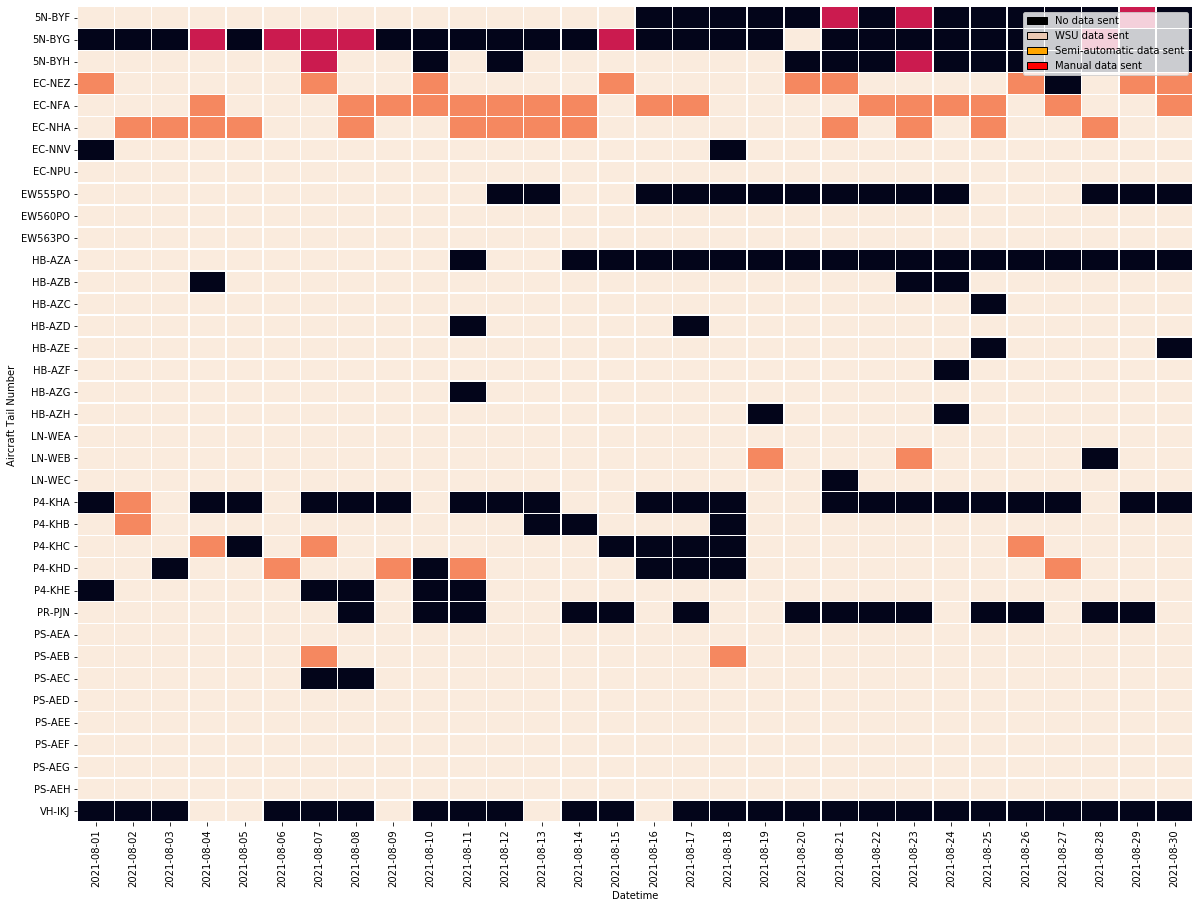

Executado em:  0:02:32.429000


In [4]:
download_path =  os.path.abspath(os.getcwd()) + r"\csv_downloads\\" #Caminho da pasta de Download
url_login="https://egs.flyembraer.com/" #Login do EGS
backup_path = r"C:\Users\jmelati\Desktop\Trabalho\Análises\EGS_Scraper_John_v0\backup\\"


data1 = "08/24/2021" #MM/DD/YYYY
data2 = "08/30/2021" #MM/DD/YYYY
try:
    driver = build_driver(download_path)
    login(driver, url_login)
    element_click_xpath("//html/body/app-root/app-logged/app-sidebar/div/app-sidebar-item[5]/div/div/div[1]/i") #EGS Files Button
    element_click_xpath("//html/body/app-root/app-logged/div/div/div/div/app-aircraft-file/app-page-title/div/div/div[2]/div/div[2]/div/div[2]/button") #Filter Button
    filter_project("E2") #Filter Project
    filter_date(data1, data2) #Filter Date
    element_click_xpath("//html/body/app-root/app-logged/div/div/div/div/app-aircraft-file/div/div/div/form/div/div[7]/button") #Search Button
    delete_csv(r"C:\Users\jmelati\Desktop\Trabalho\Análises\EGS_Scraper_John_v0\csv_downloads")
    download_table("//html/body/app-root/app-logged/div/div/div/div/app-aircraft-file/app-page-title/div/div/div[2]/div/div[2]/div/div[1]/button") #Export Button
    df_csv, df_egs = create_df(r"C:\Users\jmelati\Desktop\Trabalho\Análises\EGS_Scraper_John_v0\csv_downloads\aircraftfile.csv")
    save_df_to_backup_folder(df_egs, backup_path)
    pivot_table = pivot_table()
    save_pivot_table(pivot_table, backup_path)
    formigueiro(pivot_table)
    
except Exception as i:
    driver.quit()
    print("Ocorreu uma exceção")  
    print(i)

    
time2=datetime.datetime.now()
print('Executado em: ',time2-time1)